In [1]:
#Importing relevant packages to apply in my project1

import pandas as pd
import numpy as np

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

FSD_prj1 = '/Users/jjonoja/Desktop/ECON628-01-jjonoja/FSD/STATA/FSD1_Master_Latest.dta'
FSD = pd.read_stata(FSD_prj1)


# Panel Dataset exploring the Impact of Financial Development on Agricultural Productivity, Multi-Country (111) from 1993-2013. 


In [2]:
FSD.tail()

,Country,ATM_KM1991,C2A1991,AgTFP1991,AGVA_GDP1991,AGVA1991,AgYield1991,ARLand1991,BANKCR1991,BTOT1991,...,C2Ashare2013,rGDP2013,rGDPpc2013,Code,CID,cname,ccode,Ccode,incomegr,incomegrp
106,Uruguay,260.317460,124.95713,-0.019697,8.497831,10329.396544,2419.4,7.164895,20.437450,60.68811,...,0.14747,7.055818e+09,2070.387939,URY,380,Uruguay,URY,URY,High income: nonOECD,High income: nonOECD
107,Vanuatu,NaN,NaN,0.004049,16.559996,2949.025587,494.3,1.640689,33.246520,98.33771,...,NaN,3.017506e+08,1191.912720,VUT,432,Vanuatu,VUT,VUT,Lower middle income,Lower middle income
108,Vietnam,65.899776,NaN,0.005880,40.489133,442.082154,3006.4,16.492058,NaN,NaN,...,0.10527,3.596607e+10,400.693695,VNM,450,Vietnam,VNM,VNM,Lower middle income,Lower middle income
109,"Yemen, Rep.",38.939791,NaN,0.003462,23.124134,NaN,699.7,2.894104,4.372864,13.02364,...,0.02627,4.388687e+09,171.881485,YEM,451,"Yemen, Rep.",YEM,YEM,Lower middle income,Lower middle income
110,Zambia,NaN,NaN,0.014520,17.427687,840.682543,1639.4,3.705996,5.301918,19.83808,...,NaN,2.883178e+09,189.109406,ZMB,402,Zambia,ZMB,ZMB,Lower middle income,Lower middle income


In [3]:
# project Data read in stata file and created on a pandas dataframe

#df = pd.read_stata("/Users/jjonoja/Desktop/ECON628-01-jjonoja/FSD/STATA/FSD_Latest_Master_Stata.dta")

In [4]:
# head of dataset -Multi-country Panel dataset (long format) containing Agricultural Productivity, Economic Indicators, Financial Sector Dev, Institutional Quality, etc

FSD.head()

,Country,ATM_KM1991,C2A1991,AgTFP1991,AGVA_GDP1991,AGVA1991,AgYield1991,ARLand1991,BANKCR1991,BTOT1991,...,C2Ashare2013,rGDP2013,rGDPpc2013,Code,CID,cname,ccode,Ccode,incomegr,incomegrp
0,Albania,163.823529,NaN,0.242660,39.295295,1237.287001,2071.9,21.094891,NaN,NaN,...,0.01781,5.839370e+10,20159.031250,ALB,245,Albania,ALB,ALB,Upper middle income,Upper middle income
1,Angola,NaN,NaN,-0.004503,25.000000,NaN,417.5,2.366247,NaN,NaN,...,0.02971,4.987046e+10,2126.835205,AGO,142,Angola,AGO,AGO,Upper middle income,Upper middle income
2,Antigua and Barbuda,NaN,NaN,NaN,4.156458,2632.759094,1833.3,9.090909,47.357230,93.15018,...,0.00181,-8.416485e+09,-93532.093750,ATG,361,Antigua and Barbuda,ATG,ATG,High income: nonOECD,High income: nonOECD
3,Argentina,98.519490,NaN,0.025072,6.716492,11841.299150,2666.1,9.749003,9.190814,75.24430,...,0.10001,2.320370e+10,545.477844,ARG,345,Argentina,ARG,ARG,High income: nonOECD,High income: nonOECD
4,Armenia,NaN,NaN,-0.046549,24.973461,NaN,NaN,NaN,NaN,NaN,...,0.06129,3.303251e+09,1103.956787,ARM,301,Armenia,ARM,ARM,Lower middle income,Lower middle income


In [5]:
# I rename the columns in my data dictionary to reset the names:
FSD.rename(columns={
        'rGDPpc':'real_GDP_percapita',
        'rGDP':'real_GDP',
        'ATM_KM':'agric_tractors_machinery',
        'C2A':'credit_to_agric',
        'AgTFP':'agric_total_factor_productivity',
        'PRIVCR':'financial_sector_development',
        'POPgr':'population_growth_rate',
        'RegQty':'regulatory_quality',
        'C2Ashare':'agric_credit_share',
        'VoiceAcc':'voice_accountability',
    }, inplace=True)

In [6]:
#Displaying the first 10 countries in the panel dataset
FSD.head(10)

,Country,ATM_KM1991,C2A1991,AgTFP1991,AGVA_GDP1991,AGVA1991,AgYield1991,ARLand1991,BANKCR1991,BTOT1991,...,C2Ashare2013,rGDP2013,rGDPpc2013,Code,CID,cname,ccode,Ccode,incomegr,incomegrp
0,Albania,163.823529,NaN,0.242660,39.295295,1237.287001,2071.9,21.094891,NaN,NaN,...,0.01781,5.839370e+10,20159.031250,ALB,245,Albania,ALB,ALB,Upper middle income,Upper middle income
1,Angola,NaN,NaN,-0.004503,25.000000,NaN,417.5,2.366247,NaN,NaN,...,0.02971,4.987046e+10,2126.835205,AGO,142,Angola,AGO,AGO,Upper middle income,Upper middle income
2,Antigua and Barbuda,NaN,NaN,NaN,4.156458,2632.759094,1833.3,9.090909,47.357230,93.15018,...,0.00181,-8.416485e+09,-93532.093750,ATG,361,Antigua and Barbuda,ATG,ATG,High income: nonOECD,High income: nonOECD
3,Argentina,98.519490,NaN,0.025072,6.716492,11841.299150,2666.1,9.749003,9.190814,75.24430,...,0.10001,2.320370e+10,545.477844,ARG,345,Argentina,ARG,ARG,High income: nonOECD,High income: nonOECD
4,Armenia,NaN,NaN,-0.046549,24.973461,NaN,NaN,NaN,NaN,NaN,...,0.06129,3.303251e+09,1103.956787,ARM,301,Armenia,ARM,ARM,Lower middle income,Lower middle income
5,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,41.705810,NaN,...,0.00028,NaN,NaN,ABW,156,Aruba,ABW,ABW,High income: nonOECD,High income: nonOECD
6,Australia,NaN,NaN,0.034819,3.479652,33234.953989,1603.4,5.948739,59.313790,98.26267,...,0.08154,-7.844413e+12,-339330.062500,AUS,273,Australia,AUS,AUS,High income: OECD,High income: OECD
7,Azerbaijan,NaN,NaN,-0.048785,32.315017,NaN,NaN,NaN,NaN,NaN,...,0.04755,7.204278e+10,7650.451660,AZE,229,Azerbaijan,AZE,AZE,Upper middle income,Upper middle income
8,Bahrain,45.000000,NaN,-0.027204,0.882140,NaN,NaN,2.898551,31.493550,NaN,...,0.00148,8.472534e+10,62786.160156,BHR,344,Bahrain,BHR,BHR,High income: nonOECD,High income: nonOECD
9,Bangladesh,2.184337,NaN,-0.014739,30.365162,316.959750,2585.8,72.098026,NaN,95.32542,...,0.05407,2.090470e+10,133.017609,BGD,321,Bangladesh,BGD,BGD,Lower middle income,Lower middle income


In [7]:
#Browsing the last 10 countries in the panel dataset

FSD.tail(10)

,Country,ATM_KM1991,C2A1991,AgTFP1991,AGVA_GDP1991,AGVA1991,AgYield1991,ARLand1991,BANKCR1991,BTOT1991,...,C2Ashare2013,rGDP2013,rGDPpc2013,Code,CID,cname,ccode,Ccode,incomegr,incomegrp
101,Turkey,284.226871,NaN,0.020704,15.804027,4515.399245,2239.5,32.049166,13.783870,92.20773,...,0.00183,1.334144e+11,1750.302246,TUR,357,Turkey,TUR,TUR,Upper middle income,Upper middle income
102,Uganda,NaN,NaN,-0.011109,52.821683,442.718198,1434.1,25.123868,2.646090,NaN,...,0.07320,6.199183e+09,169.499832,UGA,114,Uganda,UGA,UGA,Low income,Low income
103,Ukraine,NaN,NaN,0.000800,22.782071,NaN,NaN,NaN,NaN,NaN,...,0.06292,4.226640e+10,929.144287,UKR,430,Ukraine,UKR,UKR,Lower middle income,Lower middle income
104,United Arab Emirates,52.285714,NaN,0.081332,NaN,NaN,1594.1,0.418660,39.156680,99.69329,...,0.00257,-6.096883e+11,-67443.554688,ARE,238,United Arab Emirates,ARE,ARE,High income: nonOECD,High income: nonOECD
105,United States,235.130119,34874.00000,0.027126,NaN,NaN,4510.3,20.272607,50.091300,93.46667,...,0.00947,1.033526e+13,32662.339844,USA,200,United States,USA,USA,High income: OECD,High income: OECD
106,Uruguay,260.317460,124.95713,-0.019697,8.497831,10329.396544,2419.4,7.164895,20.437450,60.68811,...,0.14747,7.055818e+09,2070.387939,URY,380,Uruguay,URY,URY,High income: nonOECD,High income: nonOECD
107,Vanuatu,NaN,NaN,0.004049,16.559996,2949.025587,494.3,1.640689,33.246520,98.33771,...,NaN,3.017506e+08,1191.912720,VUT,432,Vanuatu,VUT,VUT,Lower middle income,Lower middle income
108,Vietnam,65.899776,NaN,0.005880,40.489133,442.082154,3006.4,16.492058,NaN,NaN,...,0.10527,3.596607e+10,400.693695,VNM,450,Vietnam,VNM,VNM,Lower middle income,Lower middle income
109,"Yemen, Rep.",38.939791,NaN,0.003462,23.124134,NaN,699.7,2.894104,4.372864,13.02364,...,0.02627,4.388687e+09,171.881485,YEM,451,"Yemen, Rep.",YEM,YEM,Lower middle income,Lower middle income
110,Zambia,NaN,NaN,0.014520,17.427687,840.682543,1639.4,3.705996,5.301918,19.83808,...,NaN,2.883178e+09,189.109406,ZMB,402,Zambia,ZMB,ZMB,Lower middle income,Lower middle income


In [8]:
#Descriptive stat of the panel
FSD.describe()

,ATM_KM1991,C2A1991,AgTFP1991,AGVA_GDP1991,AGVA1991,AgYield1991,ARLand1991,BANKCR1991,BTOT1991,Corrupt1991,...,MobSubs2013,PolStab2013,POPgr2013,PRIVCR2013,RegQty2013,VoiceAcc2013,C2Ashare2013,rGDP2013,rGDPpc2013,CID
count,70.000000,21.000000,99.000000,86.000000,71.000000,90.000000,96.000000,89.000000,86.000000,0.0,...,111.000000,111.000000,111.000000,105.000000,111.000000,111.000000,101.000000,1.090000e+02,109.000000,111.000000
mean,188.592286,5233.673979,0.015796,21.687785,5159.995890,2066.867778,14.312290,29.311288,72.852856,NaN,...,107.772998,-0.187806,1.544613,49.833737,-0.013163,-0.076173,0.045725,1.504396e+11,594.870361,293.288288
std,337.701498,14578.850509,0.062852,14.678360,8399.617763,1338.415204,13.795853,23.201515,23.647288,NaN,...,36.833650,0.928777,1.518181,38.162704,0.764854,0.825141,0.043321,1.335228e+12,38735.230469,118.613075
min,0.136454,7.589320,-0.115453,0.261281,181.681276,252.900000,0.113086,2.391430,9.422258,NaN,...,24.962588,-2.684226,-3.339448,5.632791,-1.553017,-1.782496,0.000280,-7.844413e+12,-339330.062500,108.000000
25%,20.002943,34.919390,-0.006042,8.626283,958.956677,1224.075000,3.687927,11.248830,57.679230,NaN,...,80.586877,-0.781599,0.625871,24.370800,-0.552368,-0.672965,0.013400,8.285999e+08,171.881485,178.500000
50%,68.307296,124.957130,0.009129,19.525356,2632.759094,1693.100000,10.168696,21.446600,75.584205,NaN,...,108.191148,-0.165412,1.358093,41.658470,-0.103335,-0.108582,0.033220,7.055818e+09,952.746521,306.000000
75%,163.145425,1699.808800,0.027943,32.269439,4167.910554,2615.200000,19.716931,42.587000,93.470930,NaN,...,135.135027,0.524443,2.316656,64.215380,0.469347,0.487915,0.056040,4.994085e+10,4821.620117,391.000000
max,1635.742697,59674.720000,0.466042,61.356297,47535.091090,6538.000000,72.098026,101.142100,99.693290,NaN,...,184.694755,1.454112,9.715497,261.480600,1.975857,1.633325,0.210180,1.033526e+13,62786.160156,499.000000


In [9]:
FSD.head()

,Country,ATM_KM1991,C2A1991,AgTFP1991,AGVA_GDP1991,AGVA1991,AgYield1991,ARLand1991,BANKCR1991,BTOT1991,...,C2Ashare2013,rGDP2013,rGDPpc2013,Code,CID,cname,ccode,Ccode,incomegr,incomegrp
0,Albania,163.823529,NaN,0.242660,39.295295,1237.287001,2071.9,21.094891,NaN,NaN,...,0.01781,5.839370e+10,20159.031250,ALB,245,Albania,ALB,ALB,Upper middle income,Upper middle income
1,Angola,NaN,NaN,-0.004503,25.000000,NaN,417.5,2.366247,NaN,NaN,...,0.02971,4.987046e+10,2126.835205,AGO,142,Angola,AGO,AGO,Upper middle income,Upper middle income
2,Antigua and Barbuda,NaN,NaN,NaN,4.156458,2632.759094,1833.3,9.090909,47.357230,93.15018,...,0.00181,-8.416485e+09,-93532.093750,ATG,361,Antigua and Barbuda,ATG,ATG,High income: nonOECD,High income: nonOECD
3,Argentina,98.519490,NaN,0.025072,6.716492,11841.299150,2666.1,9.749003,9.190814,75.24430,...,0.10001,2.320370e+10,545.477844,ARG,345,Argentina,ARG,ARG,High income: nonOECD,High income: nonOECD
4,Armenia,NaN,NaN,-0.046549,24.973461,NaN,NaN,NaN,NaN,NaN,...,0.06129,3.303251e+09,1103.956787,ARM,301,Armenia,ARM,ARM,Lower middle income,Lower middle income


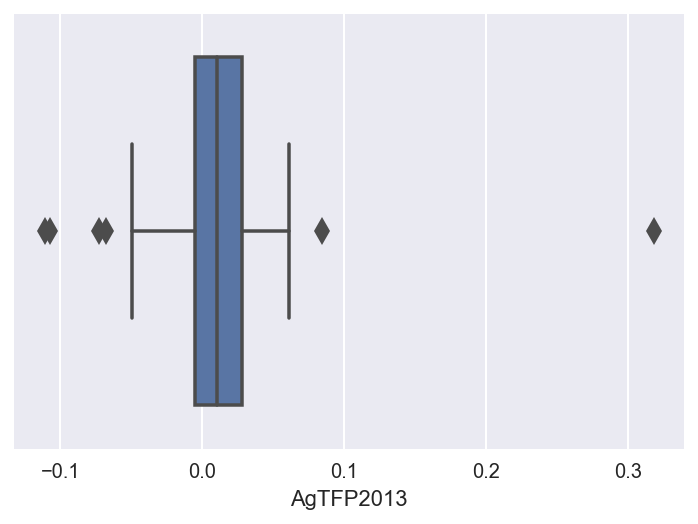

In [10]:
#Box plots for Agricultural productivity
sns.boxplot(FSD.AgTFP2013, orient='h', fliersize=10)

In [28]:
# Stats/Regresions and Graphical Packages

#Importing relevant packages to apply in my project1

import pandas as pd
import numpy as np

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error


#Uploading the 'long' format of my panel dataset 
Fsd_prj11 = '/Users/jjonoja/Desktop/ECON628-01-jjonoja/FSD/STATA/FSD_Latest_Master_Stata.dta'
Fsd = pd.read_stata(Fsd_prj11)

In [29]:
#Descriptive stat of the panel
Fsd.describe()

,Year,CID,ATM_KM,C2A,AgTFP,AGVA_GDP,AGVA,AgYield,ARLand,BANKCR,...,PolStab,POPgr,PRIVCR,RegQty,VoiceAcc,C2Ashare,rGDP,rGDPpc,rGDP1991,rGDPpc1991
count,2553.000000,2553.000000,995.000000,1571.000000,2277.000000,2299.000000,2147.000000,2377.000000,2515.000000,2421.000000,...,1656.000000,2551.000000,2421.000000,1656.000000,1660.000000,1569.000000,2.476000e+03,2.476000e+03,2.254000e+03,2254.000000
mean,2002.000000,293.288288,225.175251,3302.056911,0.013235,16.335084,7957.124023,2730.086916,15.603580,36.821536,...,-0.182550,1.644195,39.051226,-0.025830,-0.081712,0.058418,1.418931e+11,6.839520e+03,3.468558e+10,-2069.041992
std,6.634549,118.100705,346.094378,11083.730069,0.051055,13.472943,13203.907318,3538.908708,14.096026,30.959582,...,0.909598,1.674705,34.155083,0.786707,0.833591,0.059908,1.063454e+12,2.408642e+05,2.064005e+11,31861.677734
min,1991.000000,108.000000,0.092963,0.000000,-0.517240,0.035365,138.717528,110.100000,0.084006,0.873914,...,-3.184814,-6.342817,0.873914,-2.165950,-2.040115,0.000000,-7.844413e+12,-2.613266e+06,-3.852898e+11,-313267.718750
25%,1996.000000,178.000000,31.161235,19.662545,-0.007623,5.518517,1004.889155,1341.100000,4.776179,14.041070,...,-0.802208,0.626520,14.671850,-0.543667,-0.742068,0.016680,2.390208e+08,4.661659e+01,4.830781e+07,9.517283
50%,2002.000000,306.000000,117.726245,160.587610,0.013748,12.369135,3103.565962,2103.300000,11.245337,26.941590,...,-0.132806,1.590096,27.906400,-0.158438,-0.142182,0.039420,1.653206e+09,2.437371e+02,2.936545e+08,43.234011
75%,2008.000000,392.000000,245.399895,1122.849400,0.034077,25.150490,7368.353135,3333.300000,21.094891,51.686100,...,0.579093,2.549083,54.094600,0.488977,0.543809,0.086000,1.176869e+10,1.409313e+03,2.625410e+09,342.520844
max,2013.000000,499.000000,2117.052009,115392.740000,0.466042,65.972956,82469.117369,74205.600000,72.098026,261.480600,...,1.474530,17.624770,261.480600,2.247352,1.764647,0.552940,2.787936e+13,1.145987e+07,1.854895e+12,33231.425781


In [30]:
import numpy as np 

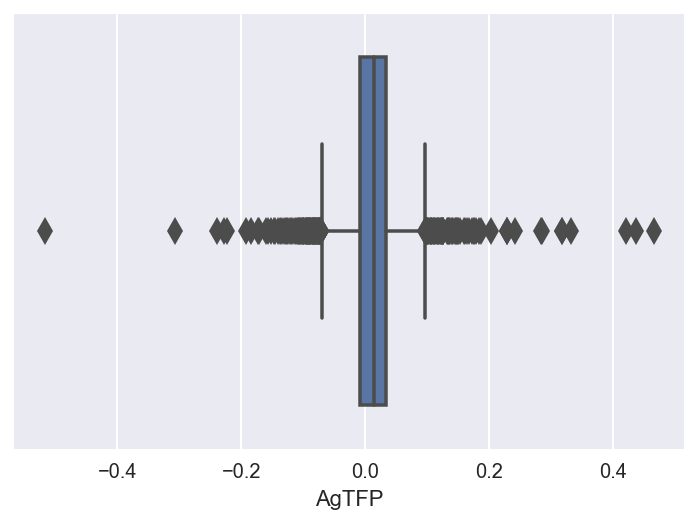

In [31]:
#Box plot of AGric productivity 1991-2013 (23 years) for 111 countries.
sns.boxplot(Fsd.AgTFP, orient='h', fliersize=10)

In [32]:
Fsd.Country.describe()

count                   2553
unique                   111
top       Russian Federation
freq                      23
Name: Country, dtype: object

In [33]:
#Grouping the countries by income 'incomegrp'


In [34]:
# Displaying the number of rows and columns in the dataset
print Fsd.shape
#Searching for missing values in the dataset
print Fsd.info()


(2553, 40)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2552
Data columns (total 40 columns):
Country       2553 non-null object
Year          2553 non-null int16
Code          2553 non-null object
CID           2553 non-null int16
ATM_KM        995 non-null float64
cname         2553 non-null category
ccode         2553 non-null category
C2A           1571 non-null float64
Ccode         2553 non-null category
AgTFP         2277 non-null float64
AGVA_GDP      2299 non-null float64
AGVA          2147 non-null float64
AgYield       2377 non-null float64
ARLand        2515 non-null float64
BANKCR        2421 non-null float64
BTOT          2368 non-null float64
Corrupt       1655 non-null float64
FeEmp         1208 non-null float64
GDP           2506 non-null float64
GDPdef        2495 non-null float64
GDPpc         2506 non-null float64
GDPpcgr       2495 non-null float64
GDPgrowth     2495 non-null float64
GovEffect     1655 non-null float64
Law           1660 non

In [35]:
Fsd.head(10)

,Country,Year,Code,CID,ATM_KM,cname,ccode,C2A,Ccode,AgTFP,...,POPgr,PRIVCR,RegQty,VoiceAcc,incomegrp,C2Ashare,rGDP,rGDPpc,rGDP1991,rGDPpc1991
0,Malaysia,1991,MYS,108,161.111111,Malaysia,MYS,NaN,MYS,0.013615,...,2.701819,67.49951,NaN,NaN,Upper middle income,NaN,1.371197e+10,732.874695,1.371197e+10,732.874695
1,Malaysia,1992,MYS,108,168.648649,Malaysia,MYS,NaN,MYS,0.011240,...,2.610572,87.09284,NaN,NaN,Upper middle income,NaN,2.450673e+10,1276.079956,1.371197e+10,732.874695
2,Malaysia,1993,MYS,108,176.663174,Malaysia,MYS,NaN,MYS,0.014169,...,2.550227,100.00290,NaN,NaN,Upper middle income,NaN,1.677791e+10,851.637756,1.371197e+10,732.874695
3,Malaysia,1994,MYS,108,213.644347,Malaysia,MYS,NaN,MYS,0.010677,...,2.532188,101.00510,NaN,NaN,Upper middle income,NaN,1.891550e+10,936.132996,1.371197e+10,732.874695
4,Malaysia,1995,MYS,108,237.884615,Malaysia,MYS,NaN,MYS,0.008089,...,2.537955,109.91830,NaN,NaN,Upper middle income,NaN,2.441317e+10,1177.936401,1.371197e+10,732.874695
5,Malaysia,1996,MYS,108,NaN,Malaysia,MYS,NaN,MYS,0.018566,...,2.551006,123.86350,0.685085,-0.061265,Upper middle income,NaN,2.740654e+10,1289.059692,1.371197e+10,732.874695
6,Malaysia,1997,MYS,108,NaN,Malaysia,MYS,NaN,MYS,0.006619,...,2.541380,139.48340,NaN,NaN,Upper middle income,NaN,2.871442e+10,1316.684448,1.371197e+10,732.874695
7,Malaysia,1998,MYS,108,NaN,Malaysia,MYS,NaN,MYS,0.041277,...,2.490732,155.24840,0.541413,-0.311179,Upper middle income,NaN,8.491220e+09,379.782227,1.371197e+10,732.874695
8,Malaysia,1999,MYS,108,NaN,Malaysia,MYS,NaN,MYS,0.034120,...,2.388493,142.85130,NaN,NaN,Upper middle income,NaN,1.729393e+12,75524.046875,1.371197e+10,732.874695
9,Malaysia,2000,MYS,108,NaN,Malaysia,MYS,NaN,MYS,0.034947,...,2.254757,122.76000,0.515947,-0.333470,Upper middle income,NaN,1.059233e+10,452.262726,1.371197e+10,732.874695


In [36]:
## replacing missing values in countries variables with the mean
Fsd['ATM_KM'].fillna(Fsd['ATM_KM'].mean(), inplace=True)
Fsd['C2A'].fillna(Fsd['C2A'].mean(), inplace=True)
Fsd['AgTFP'].fillna(Fsd['AgTFP'].mean(), inplace=True)
Fsd['AGVA_GDP'].fillna(Fsd['AGVA_GDP'].mean(), inplace=True)
Fsd['AgYield'].fillna(Fsd['AgYield'].mean(), inplace=True)
Fsd['POPgr'].fillna(Fsd['POPgr'].mean(), inplace=True)
Fsd['AgYield'].fillna(Fsd['AgYield'].mean(), inplace=True)
Fsd['GovEffect'].fillna(Fsd['GovEffect'].mean(), inplace=True)
Fsd['ARLand'].fillna(Fsd['ARLand'].mean(), inplace=True)
Fsd['PRIVCR'].fillna(Fsd['PRIVCR'].mean(), inplace=True)
Fsd['C2Ashare'].fillna(Fsd['C2Ashare'].mean(), inplace=True)
Fsd['rGDP'].fillna(Fsd['rGDP'].mean(), inplace=True)
Fsd['RegQty'].fillna(Fsd['RegQty'].mean(), inplace=True)
Fsd

,Country,Year,Code,CID,ATM_KM,cname,ccode,C2A,Ccode,AgTFP,...,POPgr,PRIVCR,RegQty,VoiceAcc,incomegrp,C2Ashare,rGDP,rGDPpc,rGDP1991,rGDPpc1991
0,Malaysia,1991,MYS,108,161.111111,Malaysia,MYS,3302.056911,MYS,0.013615,...,2.701819,67.49951,-0.025830,NaN,Upper middle income,0.058418,1.371197e+10,732.874695,1.371197e+10,732.874695
1,Malaysia,1992,MYS,108,168.648649,Malaysia,MYS,3302.056911,MYS,0.011240,...,2.610572,87.09284,-0.025830,NaN,Upper middle income,0.058418,2.450673e+10,1276.079956,1.371197e+10,732.874695
2,Malaysia,1993,MYS,108,176.663174,Malaysia,MYS,3302.056911,MYS,0.014169,...,2.550227,100.00290,-0.025830,NaN,Upper middle income,0.058418,1.677791e+10,851.637756,1.371197e+10,732.874695
3,Malaysia,1994,MYS,108,213.644347,Malaysia,MYS,3302.056911,MYS,0.010677,...,2.532188,101.00510,-0.025830,NaN,Upper middle income,0.058418,1.891550e+10,936.132996,1.371197e+10,732.874695
4,Malaysia,1995,MYS,108,237.884615,Malaysia,MYS,3302.056911,MYS,0.008089,...,2.537955,109.91830,-0.025830,NaN,Upper middle income,0.058418,2.441317e+10,1177.936401,1.371197e+10,732.874695
5,Malaysia,1996,MYS,108,225.175251,Malaysia,MYS,3302.056911,MYS,0.018566,...,2.551006,123.86350,0.685085,-0.061265,Upper middle income,0.058418,2.740654e+10,1289.059692,1.371197e+10,732.874695
6,Malaysia,1997,MYS,108,225.175251,Malaysia,MYS,3302.056911,MYS,0.006619,...,2.541380,139.48340,-0.025830,NaN,Upper middle income,0.058418,2.871442e+10,1316.684448,1.371197e+10,732.874695
7,Malaysia,1998,MYS,108,225.175251,Malaysia,MYS,3302.056911,MYS,0.041277,...,2.490732,155.24840,0.541413,-0.311179,Upper middle income,0.058418,8.491220e+09,379.782227,1.371197e+10,732.874695
8,Malaysia,1999,MYS,108,225.175251,Malaysia,MYS,3302.056911,MYS,0.034120,...,2.388493,142.85130,-0.025830,NaN,Upper middle income,0.058418,1.729393e+12,75524.046875,1.371197e+10,732.874695
9,Malaysia,2000,MYS,108,225.175251,Malaysia,MYS,3302.056911,MYS,0.034947,...,2.254757,122.76000,0.515947,-0.333470,Upper middle income,0.058418,1.059233e+10,452.262726,1.371197e+10,732.874695


In [37]:
Fsd.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2553.0,2.002000e+03,6.634549e+00,1.991000e+03,1.996000e+03,2.002000e+03,2.008000e+03,2.013000e+03
CID,2553.0,2.932883e+02,1.181007e+02,1.080000e+02,1.780000e+02,3.060000e+02,3.920000e+02,4.990000e+02
ATM_KM,2553.0,2.251753e+02,2.159968e+02,9.296339e-02,1.661067e+02,2.251753e+02,2.251753e+02,2.117052e+03
C2A,2553.0,3.302057e+03,8.693515e+03,0.000000e+00,6.611686e+01,1.959466e+03,3.302057e+03,1.153927e+05
AgTFP,2553.0,1.323471e-02,4.821508e-02,-5.172401e-01,-4.222492e-03,1.323471e-02,3.128895e-02,4.660416e-01
AGVA_GDP,2553.0,1.633508e+01,1.278489e+01,3.536502e-02,6.255229e+00,1.429420e+01,2.311413e+01,6.597296e+01
AGVA,2147.0,7.957124e+03,1.320391e+04,1.387175e+02,1.004889e+03,3.103566e+03,7.368353e+03,8.246912e+04
AgYield,2553.0,2.730087e+03,3.414698e+03,1.101000e+02,1.391400e+03,2.261700e+03,3.188900e+03,7.420560e+04
ARLand,2553.0,1.560358e+01,1.399069e+01,8.400646e-02,4.873294e+00,1.154201e+01,2.105839e+01,7.209803e+01
BANKCR,2421.0,3.682154e+01,3.095958e+01,8.739137e-01,1.404107e+01,2.694159e+01,5.168610e+01,2.614806e+02


In [38]:
#observations with 0 are not variables but identifying codes, hence they are ignored.
Fsd.isnull().sum()

Country          0
Year             0
Code             0
CID              0
ATM_KM           0
cname            0
ccode            0
C2A              0
Ccode            0
AgTFP            0
AGVA_GDP         0
AGVA           406
AgYield          0
ARLand           0
BANKCR         132
BTOT           185
Corrupt        898
FeEmp         1345
GDP             47
GDPdef          58
GDPpc           47
GDPpcgr         58
GDPgrowth       58
GovEffect        0
Law            893
incomegr         0
LLY            157
MaEmp         1345
MobSubs         30
PolStab        897
POPgr            0
PRIVCR           0
RegQty           0
VoiceAcc       893
incomegrp        0
C2Ashare         0
rGDP             0
rGDPpc          77
rGDP1991       299
rGDPpc1991     299
dtype: int64

In [39]:
#ATM_KM has the most missing obervations for most countries.
Fsd.AgYield.describe()
#Important Variables: AgYield, C2Ashare, PRIVCR, rGDP, ARLand, GovEffect

count     2553.000000
mean      2730.086916
std       3414.697547
min        110.100000
25%       1391.400000
50%       2261.700000
75%       3188.900000
max      74205.600000
Name: AgYield, dtype: float64

In [42]:
Fsd.PRIVCR.describe()

count    2553.000000
mean       39.051226
std        33.260034
min         0.873914
25%        15.231270
50%        29.901550
75%        52.745220
max       261.480600
Name: PRIVCR, dtype: float64

In [43]:
Fsd.C2Ashare.describe()

count    2553.000000
mean        0.058418
std         0.046959
min         0.000000
25%         0.028750
50%         0.058418
75%         0.058418
max         0.552940
Name: C2Ashare, dtype: float64

In [44]:
Fsd.rGDP.describe()

count    2.553000e+03
mean     1.418932e+11
std      1.047288e+12
min     -7.844413e+12
25%      2.589247e+08
50%      1.826411e+09
75%      1.478699e+10
max      2.787936e+13
Name: rGDP, dtype: float64

In [45]:
Fsd.ARLand.describe()

count    2553.000000
mean       15.603580
std        13.990686
min         0.084006
25%         4.873294
50%        11.542013
75%        21.058394
max        72.098026
Name: ARLand, dtype: float64

In [46]:
#Replacing missing values with the mean values for all my key variables of interest for all 111 countries.
Fsd.groupby(['Country'], sort=True)[['AgYield', 'PRIVCR','C2Ashare', 'ARLand','rGDP','GovEffect']].mean().sort_values(by=['AgYield', 'PRIVCR','C2Ashare','ARLand','rGDP','GovEffect'], ascending=False).reset_index()

,Country,AgYield,PRIVCR,C2Ashare,ARLand,rGDP,GovEffect
0,United Arab Emirates,18403.313043,49.063723,0.025247,0.590805,2.214755e+10,0.547246
1,St. Vincent and the Grenadines,11675.786957,48.342817,0.030702,12.597547,1.455080e+09,0.254957
2,France,6927.908696,82.000168,0.057935,33.318545,2.805274e+12,0.993717
3,"Egypt, Arab Rep.",6895.613043,37.883150,0.026310,2.779791,1.925088e+10,-0.281871
4,New Zealand,6616.143478,95.621183,0.144631,4.026664,-1.912249e+10,1.136178
5,Germany,6469.321739,99.832173,0.027999,33.874864,2.846511e+12,1.043243
6,Belgium,6413.868793,61.312908,0.047311,22.901165,2.376284e+11,1.100361
7,United States,5952.034783,158.451796,0.012192,18.560856,6.296929e+12,1.043361
8,Italy,5021.234783,69.110191,0.054530,26.878260,9.706563e+11,0.340990
9,Oman,4898.991304,33.387993,0.028770,0.101089,-1.354182e+09,0.223471


In [46]:
Fsd.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2553.0,2.002000e+03,6.634549e+00,1.991000e+03,1.996000e+03,2.002000e+03,2.008000e+03,2.013000e+03
CID,2553.0,2.932883e+02,1.181007e+02,1.080000e+02,1.780000e+02,3.060000e+02,3.920000e+02,4.990000e+02
ATM_KM,2553.0,2.251753e+02,2.159968e+02,9.296339e-02,1.661067e+02,2.251753e+02,2.251753e+02,2.117052e+03
C2A,2553.0,3.302057e+03,8.693515e+03,0.000000e+00,6.611686e+01,1.959466e+03,3.302057e+03,1.153927e+05
AgTFP,2553.0,1.323471e-02,4.821508e-02,-5.172401e-01,-4.222492e-03,1.323471e-02,3.128895e-02,4.660416e-01
AGVA_GDP,2553.0,1.633508e+01,1.278489e+01,3.536502e-02,6.255229e+00,1.429420e+01,2.311413e+01,6.597296e+01
AGVA,2147.0,7.957124e+03,1.320391e+04,1.387175e+02,1.004889e+03,3.103566e+03,7.368353e+03,8.246912e+04
AgYield,2553.0,2.730087e+03,3.414698e+03,1.101000e+02,1.391400e+03,2.261700e+03,3.188900e+03,7.420560e+04
ARLand,2553.0,1.560358e+01,1.399069e+01,8.400646e-02,4.873294e+00,1.154201e+01,2.105839e+01,7.209803e+01
BANKCR,2421.0,3.682154e+01,3.095958e+01,8.739137e-01,1.404107e+01,2.694159e+01,5.168610e+01,2.614806e+02


In [47]:
#Expolatory Analysis of the Panel dataset by the five income groups of all countries
Fsd.groupby(['incomegrp'], sort=True)[['AgYield','PRIVCR','C2Ashare','ARLand','GovEffect','rGDP']].mean().sort_values(by=['AgYield', 'PRIVCR','C2Ashare','ARLand','GovEffect','rGDP'], ascending=False).reset_index()

,incomegrp,AgYield,PRIVCR,C2Ashare,ARLand,GovEffect,rGDP
0,High income: OECD,4619.479742,79.263730,0.051182,22.676198,0.828827,1.097594e+12
1,High income: nonOECD,3929.075021,53.246481,0.040886,8.557617,0.386117,-1.086678e+10
2,Upper middle income,2575.272827,40.214712,0.055826,11.621603,-0.118655,3.496667e+10
3,Lower middle income,2297.636655,27.134128,0.070642,18.216074,-0.320578,1.278594e+10
4,Low income,1291.812500,15.177123,0.061028,19.536099,-0.546243,2.100246e+09


In [48]:
#df1=df.copy(deep=True)

In [49]:
#Exploratory Analysis shows that Agric adds more value to economy of low income countries but receives less credit
#compared to high income countries 

In [50]:
#df1.dropna()

In [51]:
#np.all(np.isnan(ATM_KM))

# Correlation Matrix showing relationships between the variables

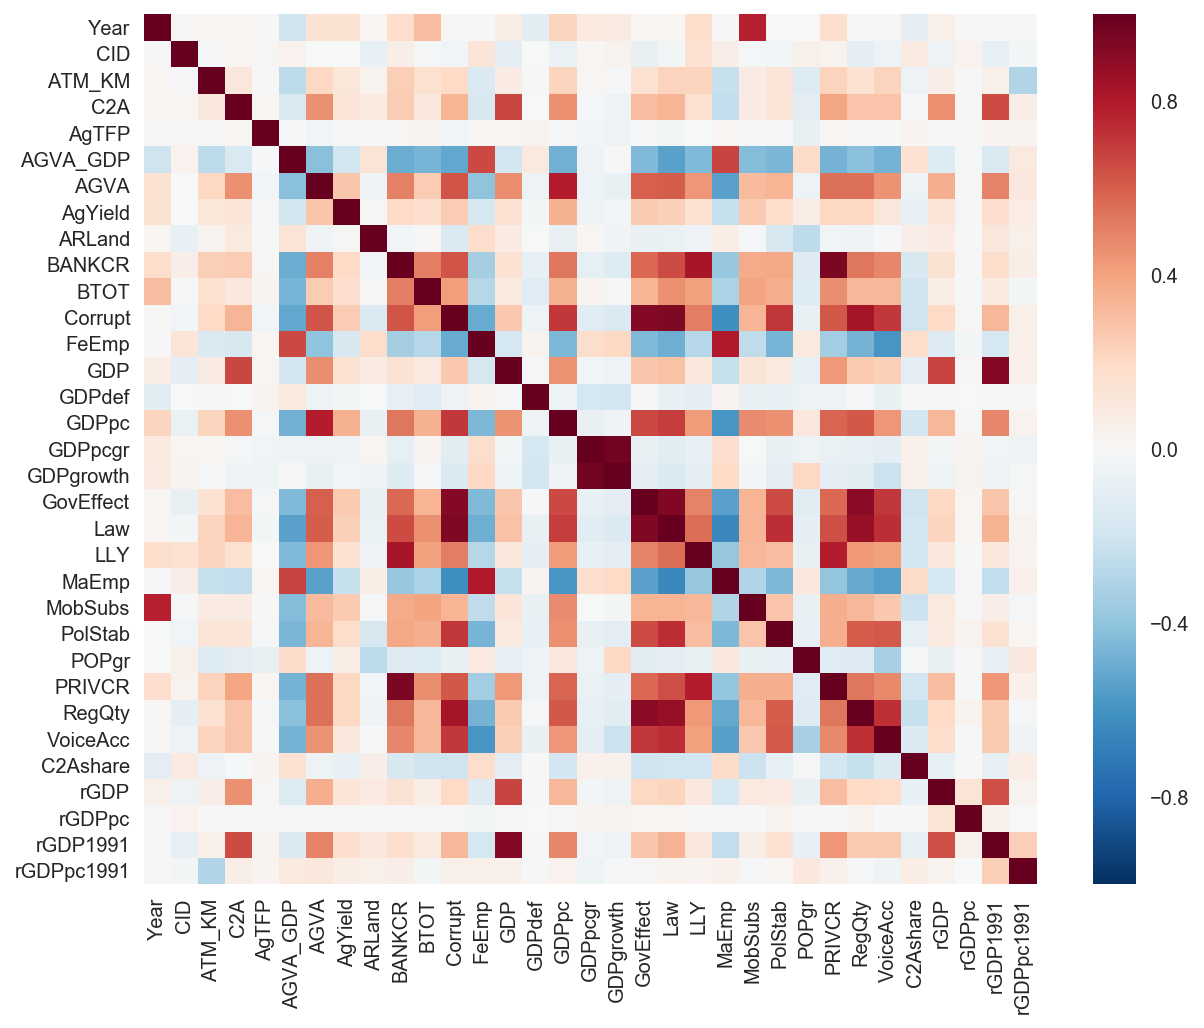

In [52]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(Fsd.corr(), ax=ax)
plt.show()

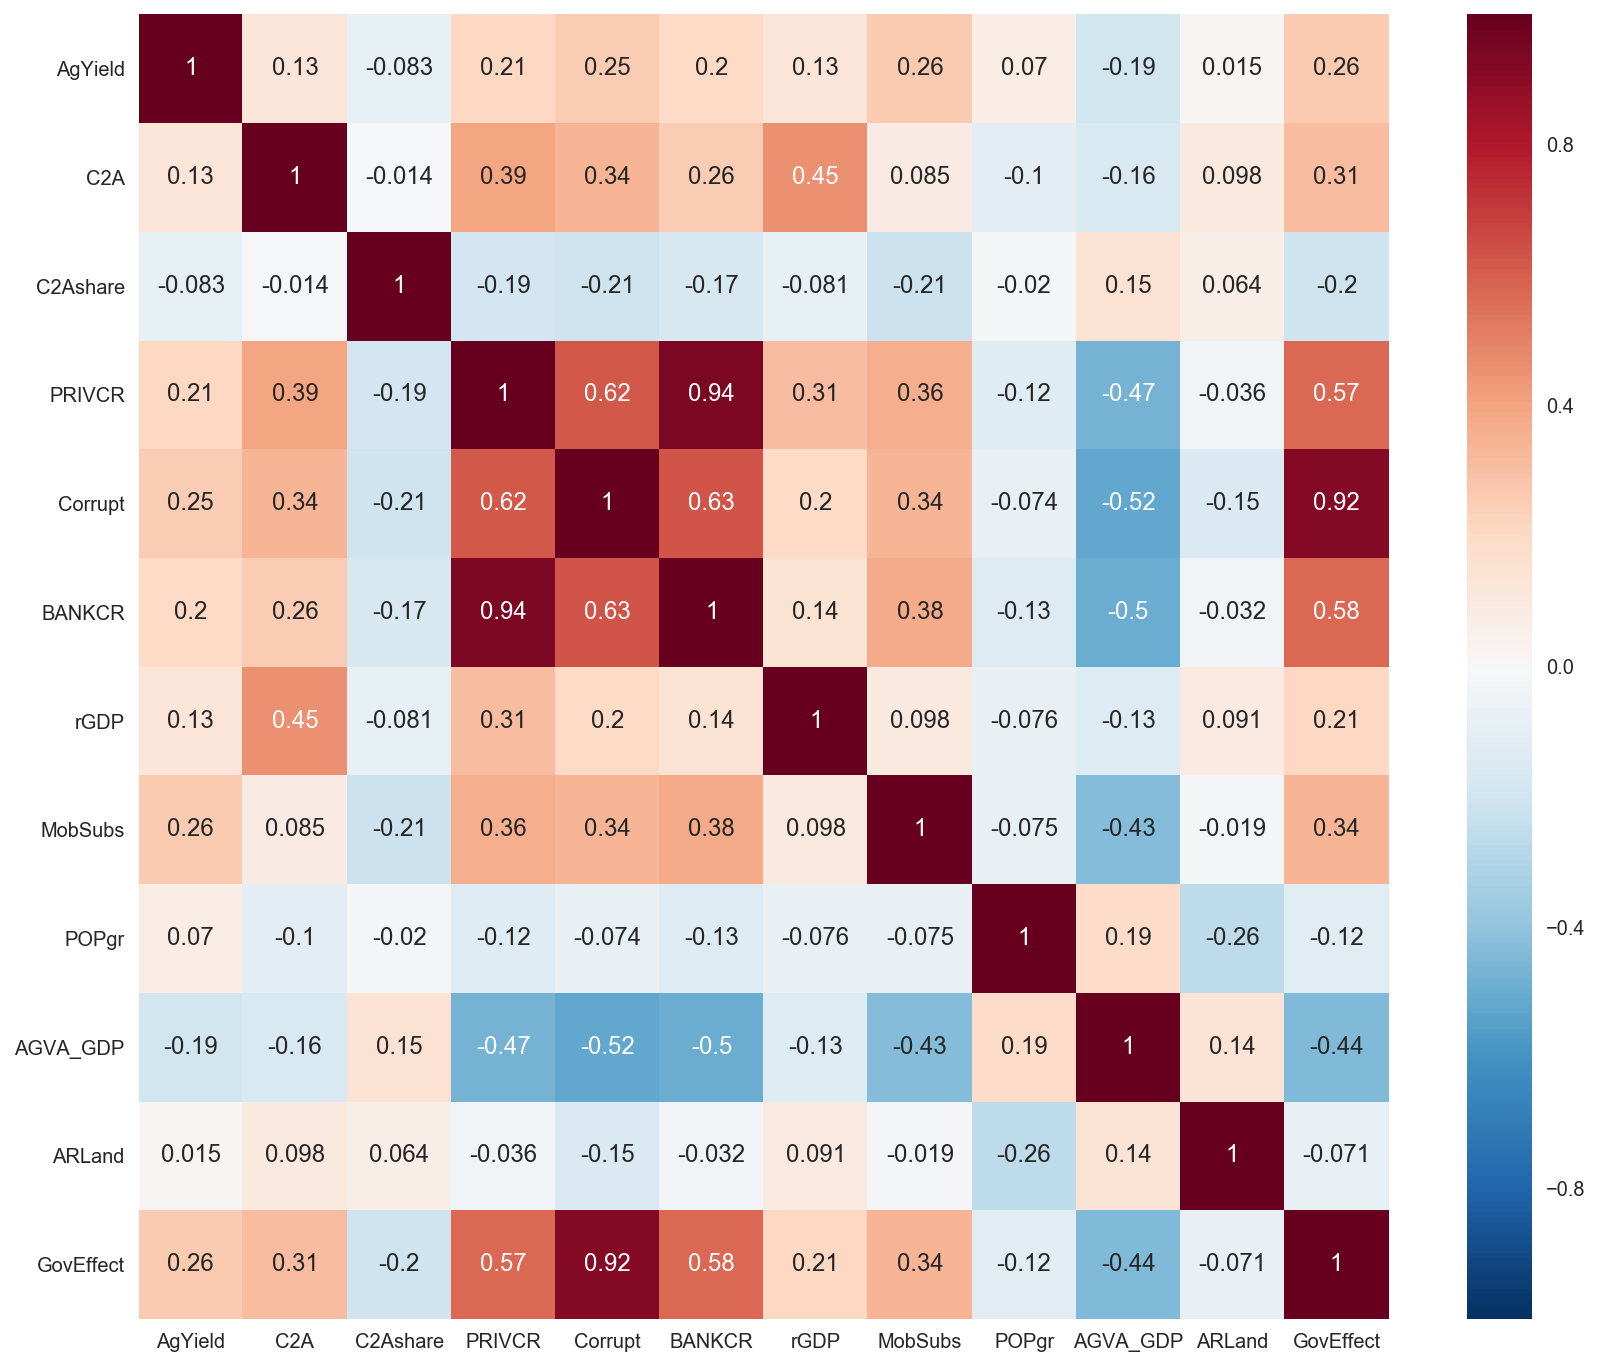

In [76]:
#Obtaining correlation matrix for fewer variables of interest rather than the entire variables in the data frame.
fig = plt.figure(figsize=(14,12))
ax = fig.gca()
sns.heatmap(Fsd[['AgYield', 'C2A', 'C2Ashare', 'PRIVCR', 'Corrupt','BANKCR','rGDP','MobSubs', 'POPgr','AGVA_GDP','ARLand','GovEffect']].corr(),annot=True, ax=ax)
plt.show()

# Graphical illustrations

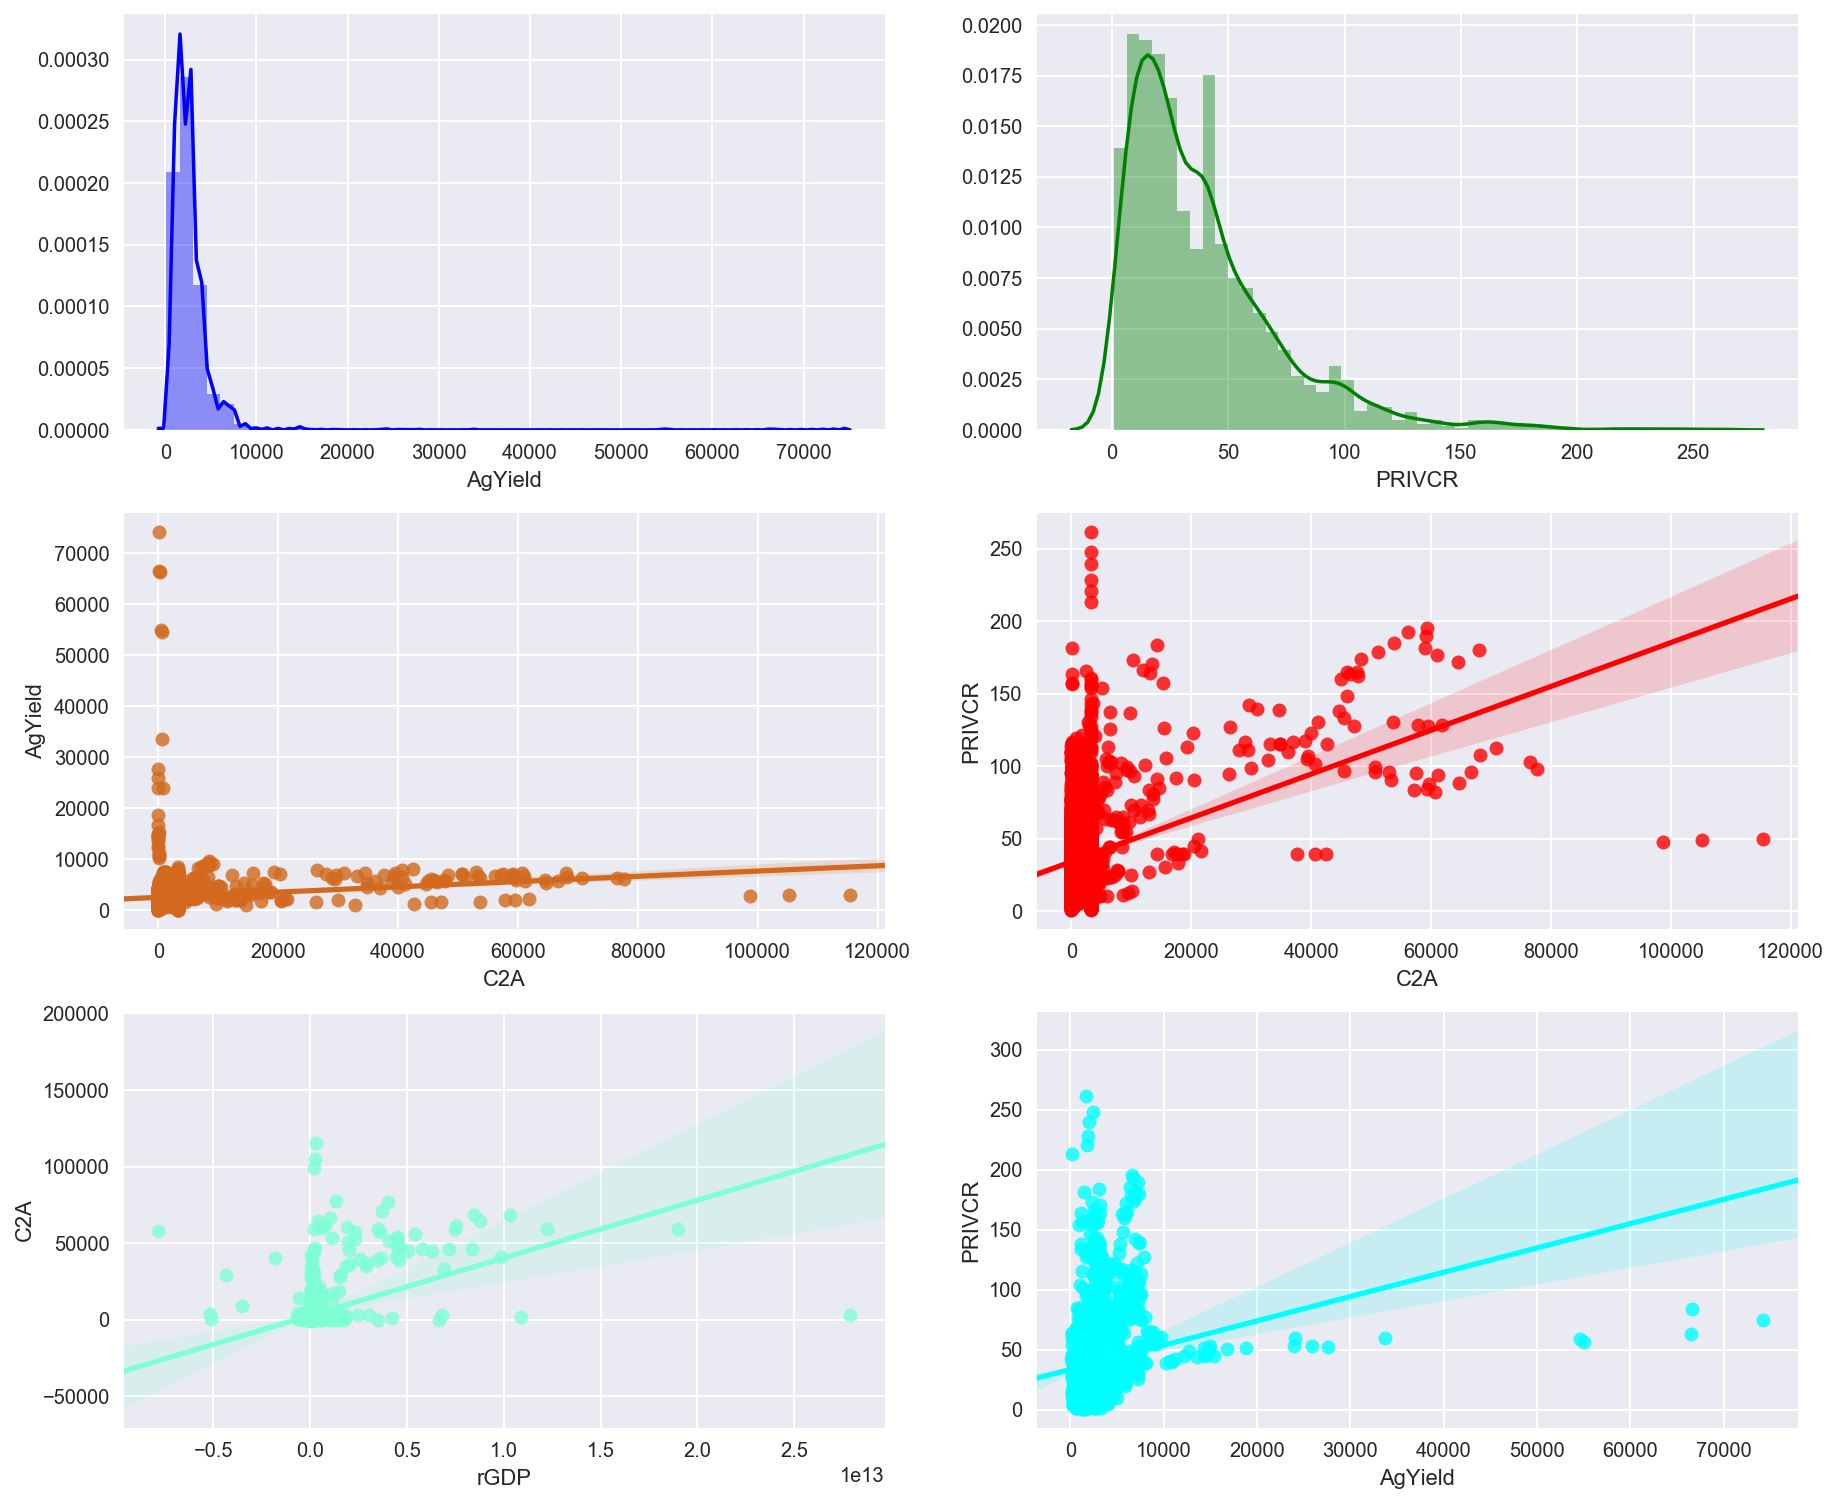

In [53]:
fig, axarr = plt.subplots(3, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(Fsd.AgYield ,ax=axarr[0,0], color='blue')

axarr[0,1] = sns.distplot(Fsd.PRIVCR ,ax=axarr[0,1], color='green')       
                          
axarr[1,0] = sns.regplot(Fsd.C2A,
                       Fsd.AgYield, ax=axarr[1,0], color='chocolate')

axarr[1,1] = sns.regplot(Fsd.C2A,
                       Fsd.PRIVCR, ax=axarr[1,1], color='red')

axarr[2,0] = sns.regplot(Fsd.rGDP,
                       Fsd.C2A, ax=axarr[2,0], color='aquamarine')

axarr[2,1] = sns.regplot(Fsd.AgYield,
                       Fsd.PRIVCR, ax=axarr[2,1], color='cyan')

plt.show()

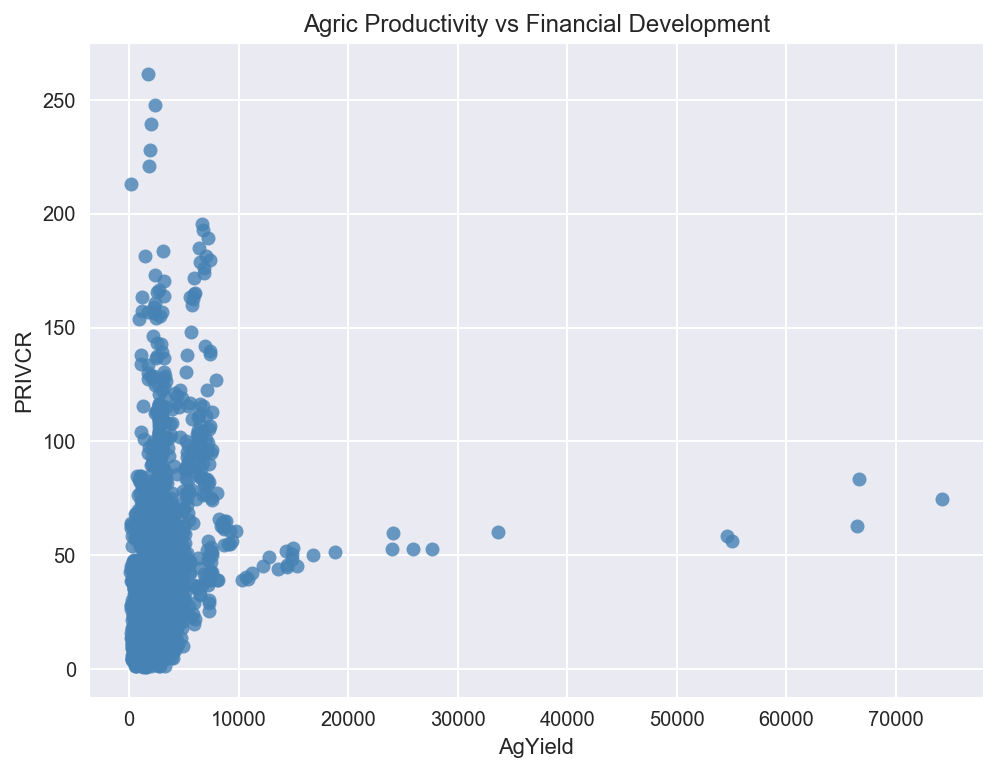

In [54]:
Agric_Productivity = Fsd.AgYield
Fin_Development = Fsd.PRIVCR

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(Agric_Productivity, Fin_Development, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('Agric Productivity vs Financial Development')
plt.show()

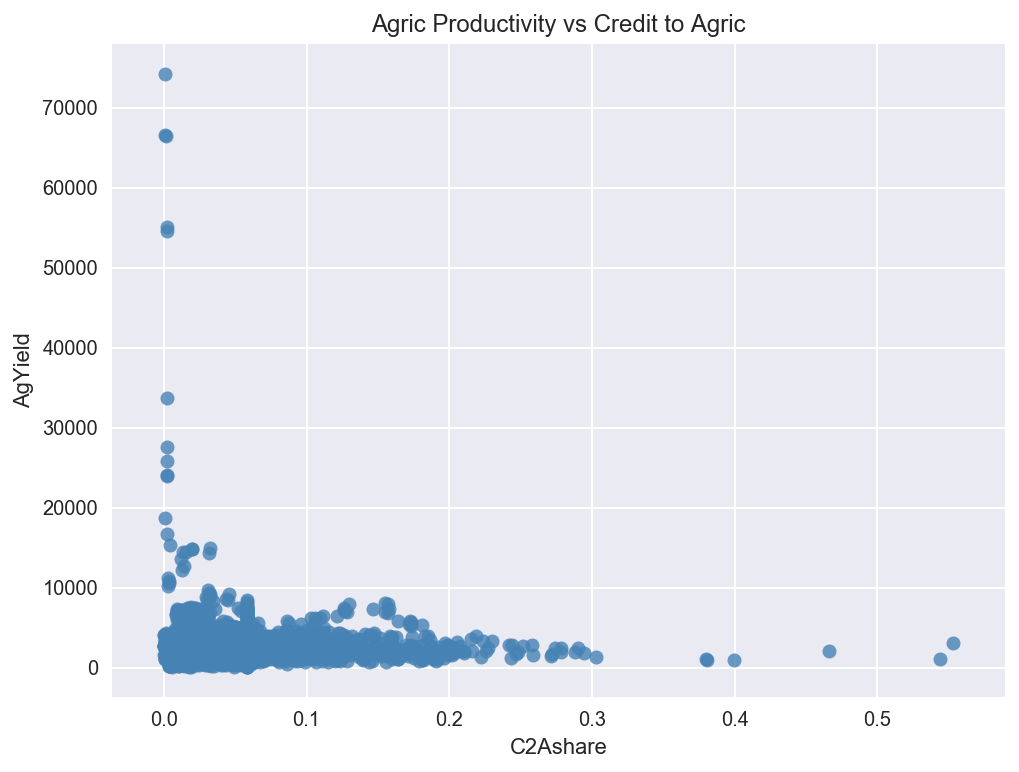

In [55]:
Agric_Creditshare = Fsd.C2Ashare
Agric_Productivity = Fsd.AgYield

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(Agric_Creditshare, Agric_Productivity, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('Agric Productivity vs Credit to Agric')
plt.show()

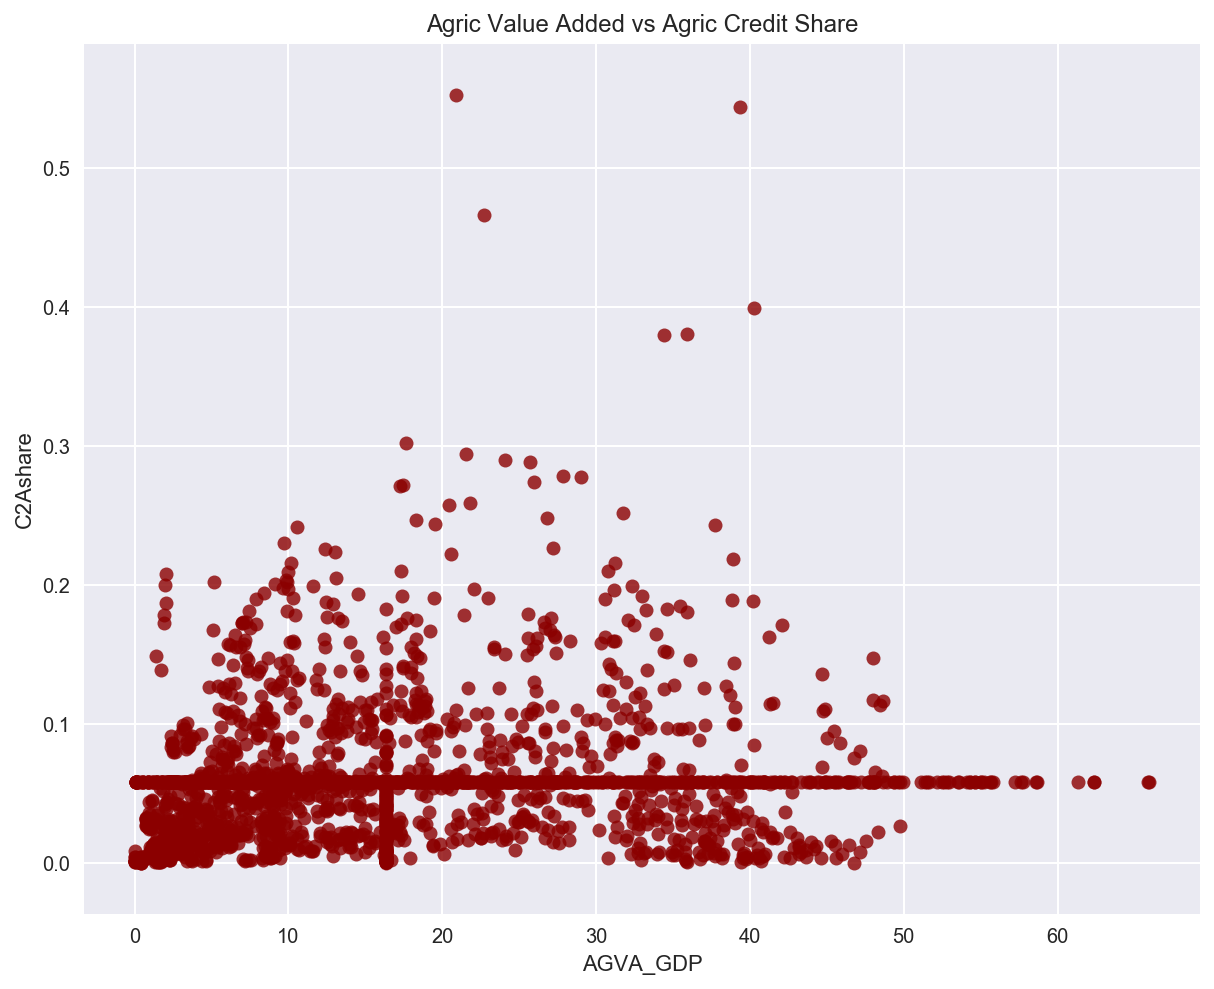

In [56]:
Agric_Value = Fsd.AGVA_GDP
Agric_Creditshare = Fsd.C2Ashare

fig = plt.figure(figsize=(10,8))
ax = fig.gca()

ax = sns.regplot(Agric_Value, Agric_Creditshare, fit_reg=False, color='darkred', ax=ax)

ax.set_title('Agric Value Added vs Agric Credit Share')
plt.show()

In [57]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

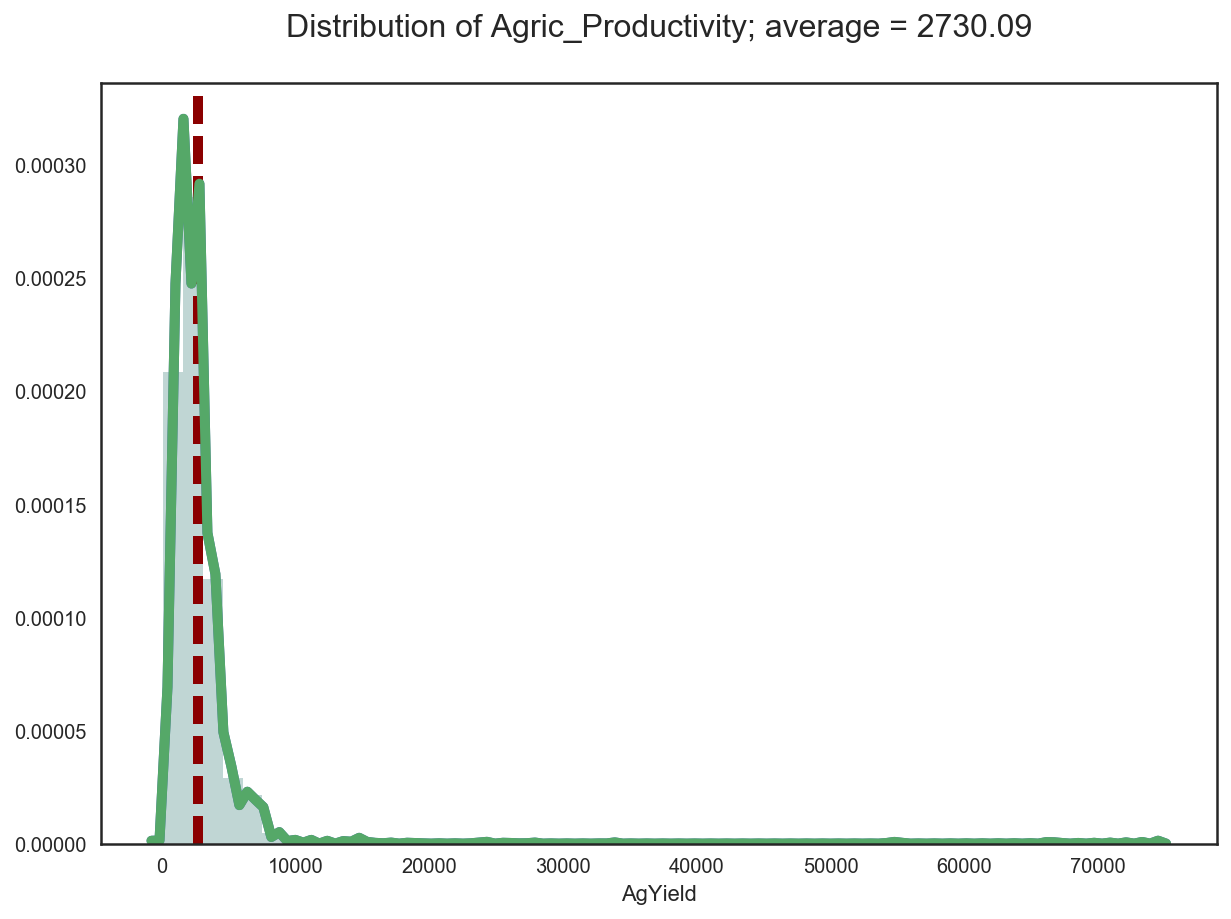

In [58]:
histogram_plotter("Agric_Productivity", Fsd.AgYield)

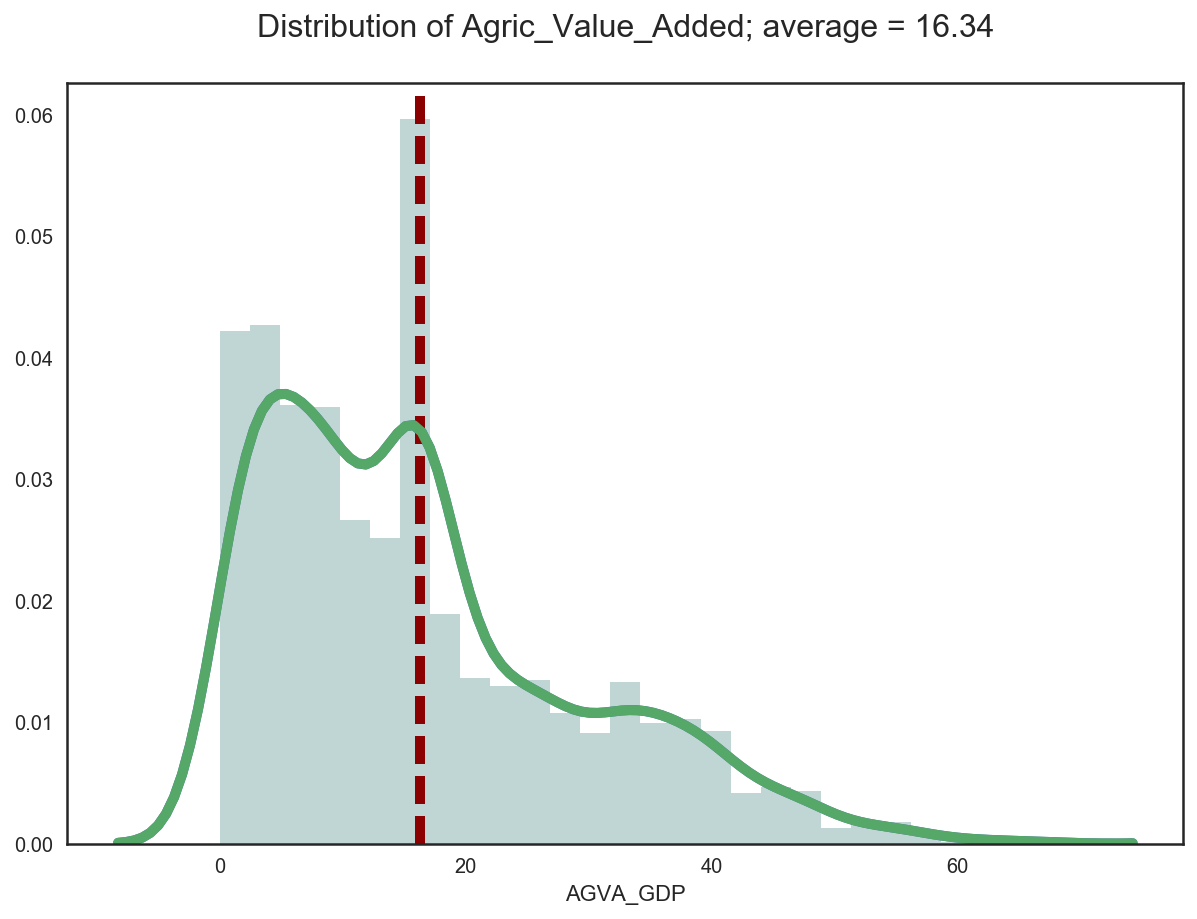

In [59]:
histogram_plotter("Agric_Value_Added", Fsd.AGVA_GDP)

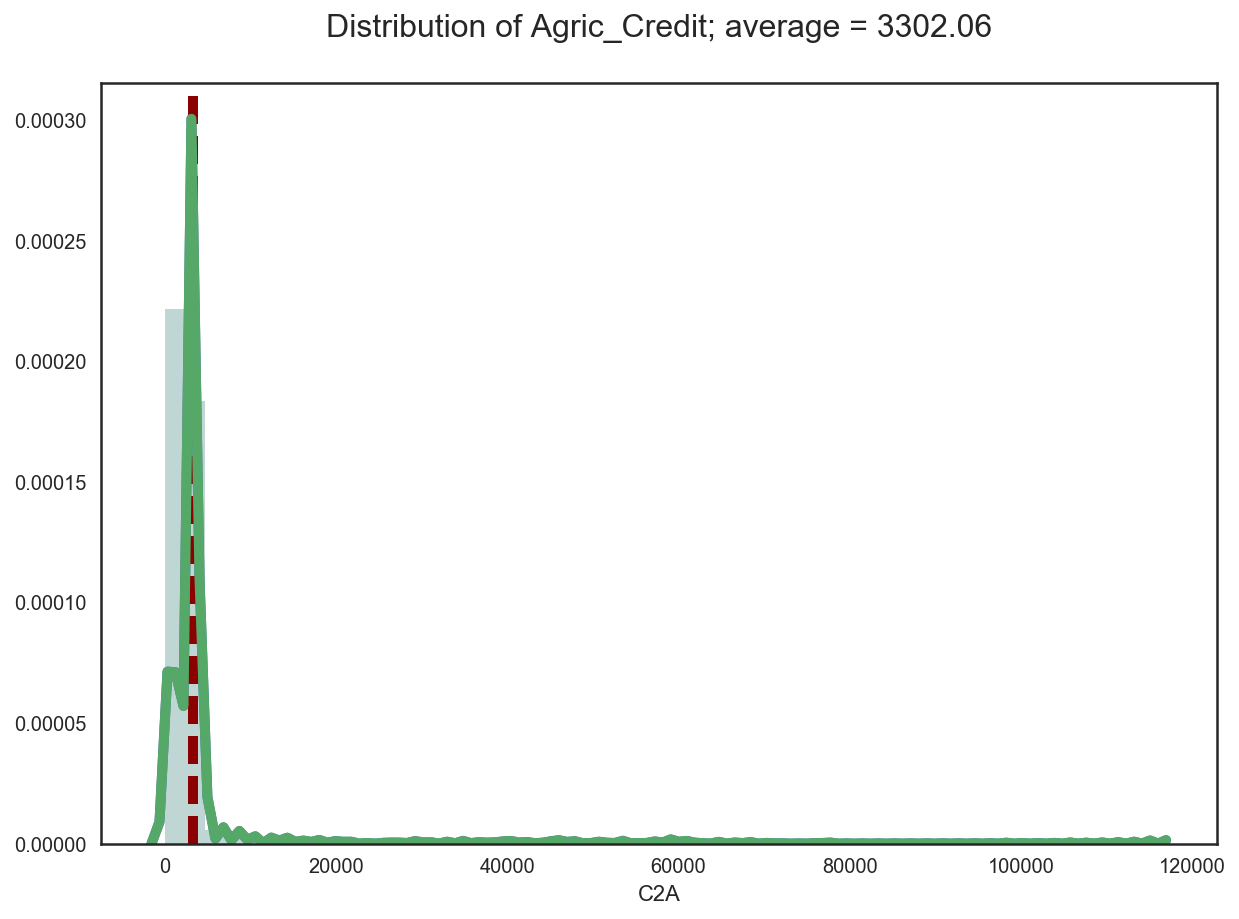

In [60]:
histogram_plotter("Agric_Credit", Fsd.C2A)

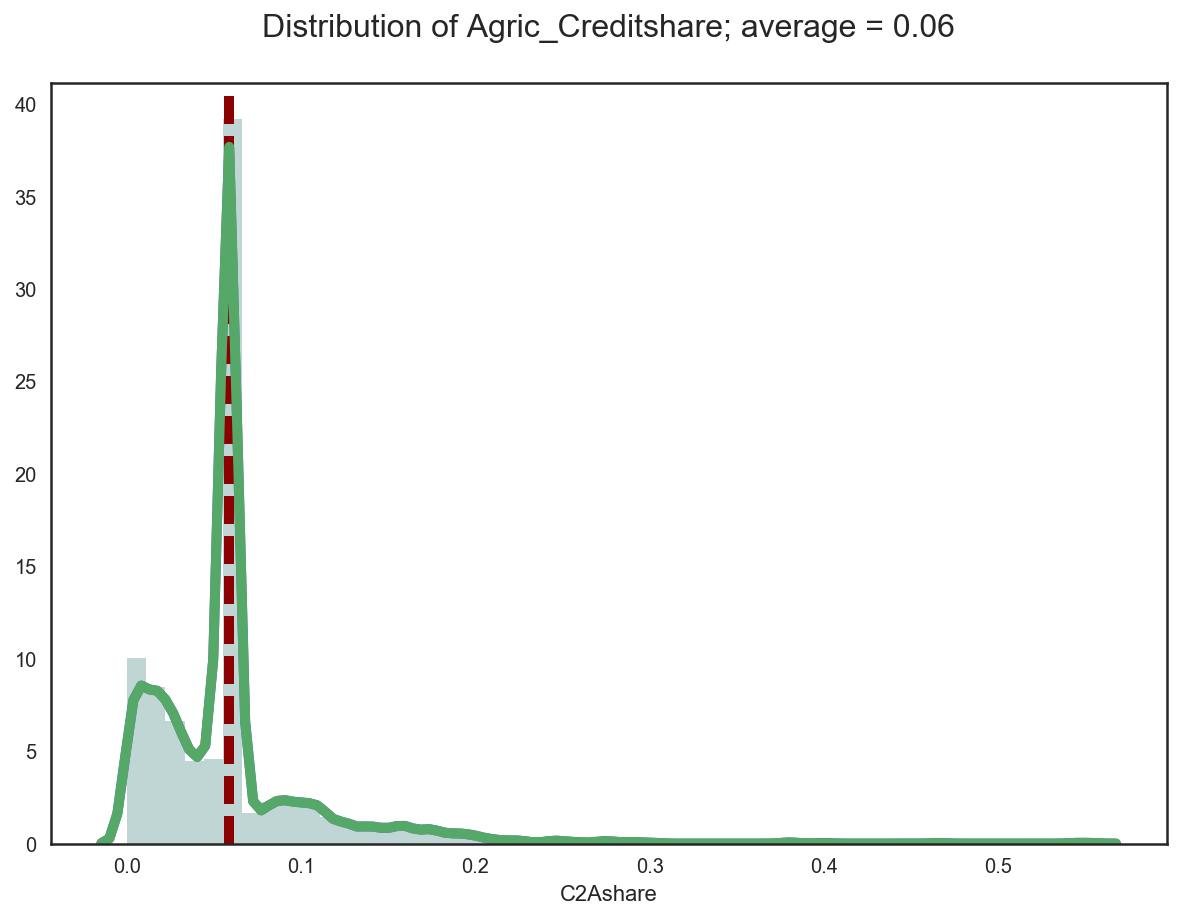

In [61]:
histogram_plotter("Agric_Creditshare", Fsd.C2Ashare)

# Modeling and Regression Analysis

In [62]:
## Log Credit to Agriculture, Crop Yield per hectre and Agric Value Added
Fsd['log_Agric_ValueAdded'] = Fsd.AGVA.apply(np.log)
Fsd['log_Agric_Credit'] = Fsd.C2A.apply(np.log)
Fsd['log_AgYield'] = Fsd.AgYield.apply(np.log)


In [63]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

## Defining y and X
y, X = patsy.dmatrices("log_AgYield ~ C2Ashare", data=Fsd, return_type="dataframe")
y = np.ravel(y)
print (y.shape) 
print (X.shape)

(2553,)
(2553, 2)


/Users/jjonoja/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

(1787, 2) (766, 2) (1787,) (766,)


In [65]:
#Multi Variables Regression with control Variables
## Defining y and X
y1, X1 = patsy.dmatrices("log_AgYield ~  C2Ashare+ PRIVCR", data=Fsd, return_type="dataframe")
y1 = np.ravel(y1)
print (y1.shape)
print ("\n=====\n")
print (X1.shape)

(2553,)

=====

(2553, 3)


In [66]:
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.30)
print ("Shape of X train:", X1train.shape) 
print ("Shape of y train:", y1train.shape)
print ("\n=====\n")
print ("Shape of X test:", X1test.shape)
print ("Shape of y test:", y1test.shape)

('Shape of X train:', (1787, 3))
('Shape of y train:', (1787,))

=====

('Shape of X test:', (766, 3))
('Shape of y test:', (766,))


In [67]:
lm_stats_1 = smf.ols(formula='log_AgYield ~  C2Ashare+ PRIVCR + rGDP', data=Fsd).fit()
print (lm_stats_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_AgYield   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     108.2
Date:                Mon, 27 Feb 2017   Prob (F-statistic):           5.86e-66
Time:                        15:10:27   Log-Likelihood:                -2594.8
No. Observations:                2553   AIC:                             5198.
Df Residuals:                    2549   BIC:                             5221.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.3358      0.029    257.284      0.0

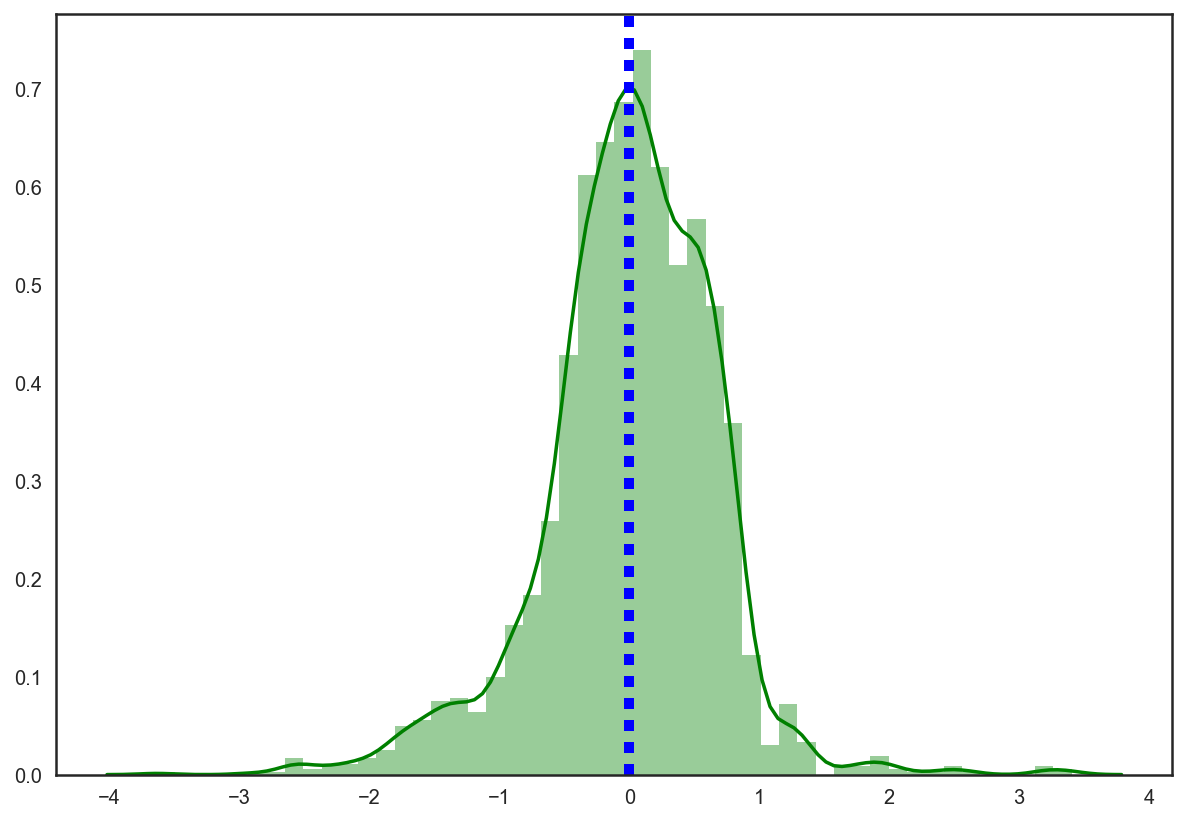

In [68]:
## make a graph of your residuals and include a line for the mean
np.mean(lm_stats_1.resid)
sns.distplot(lm_stats_1.resid, color='g')
plt.axvline(np.mean(lm_stats_1.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

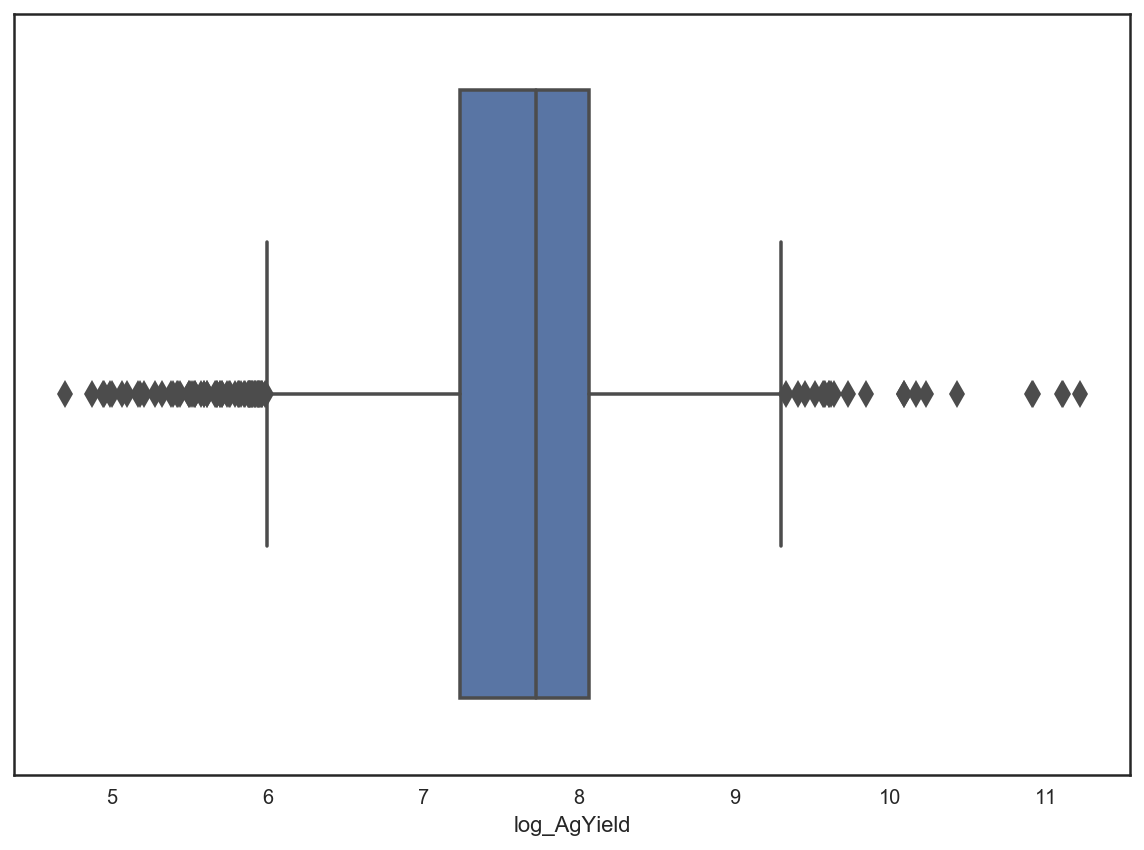

In [69]:
#Box plots for Crop Yield Per hectare (Agricultural productivity)
sns.boxplot(Fsd.log_AgYield, orient='h', fliersize=10)

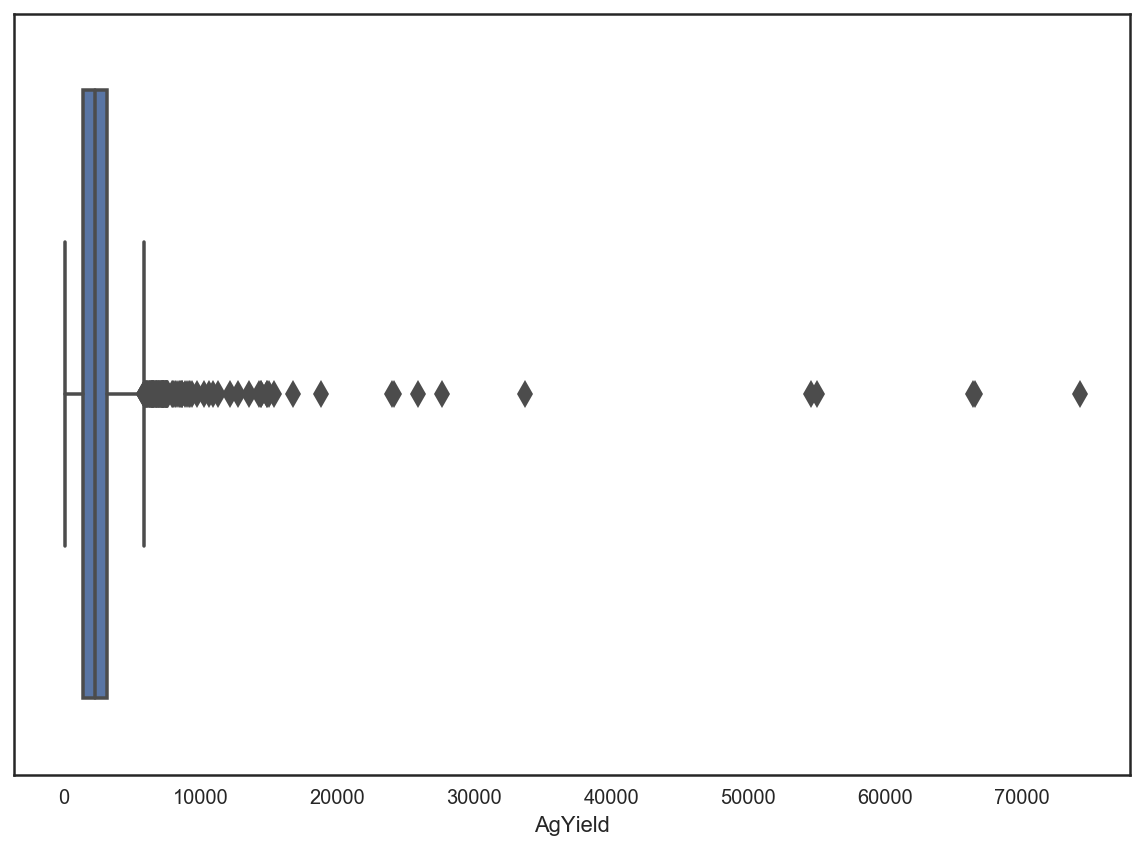

In [70]:
sns.boxplot(Fsd.AgYield, orient='h', fliersize=10)

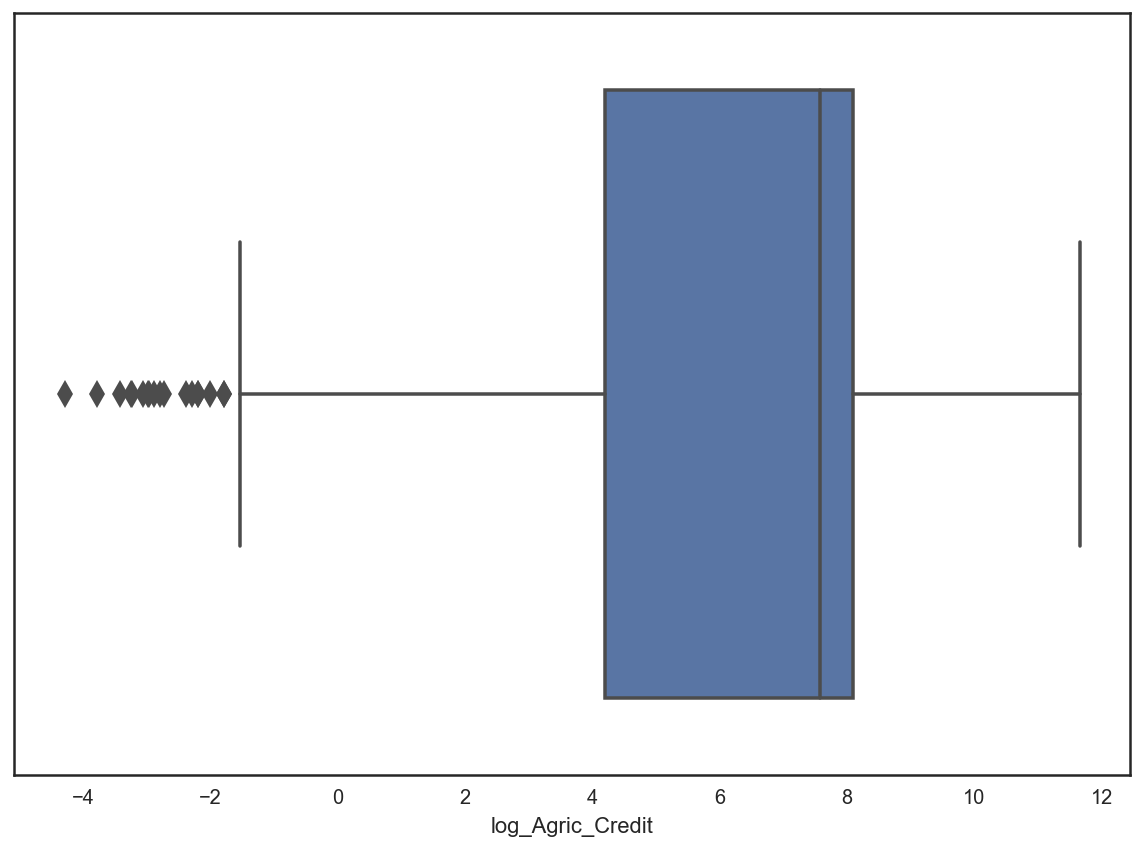

In [71]:
sns.boxplot(Fsd.log_Agric_Credit, orient='h', fliersize=10)

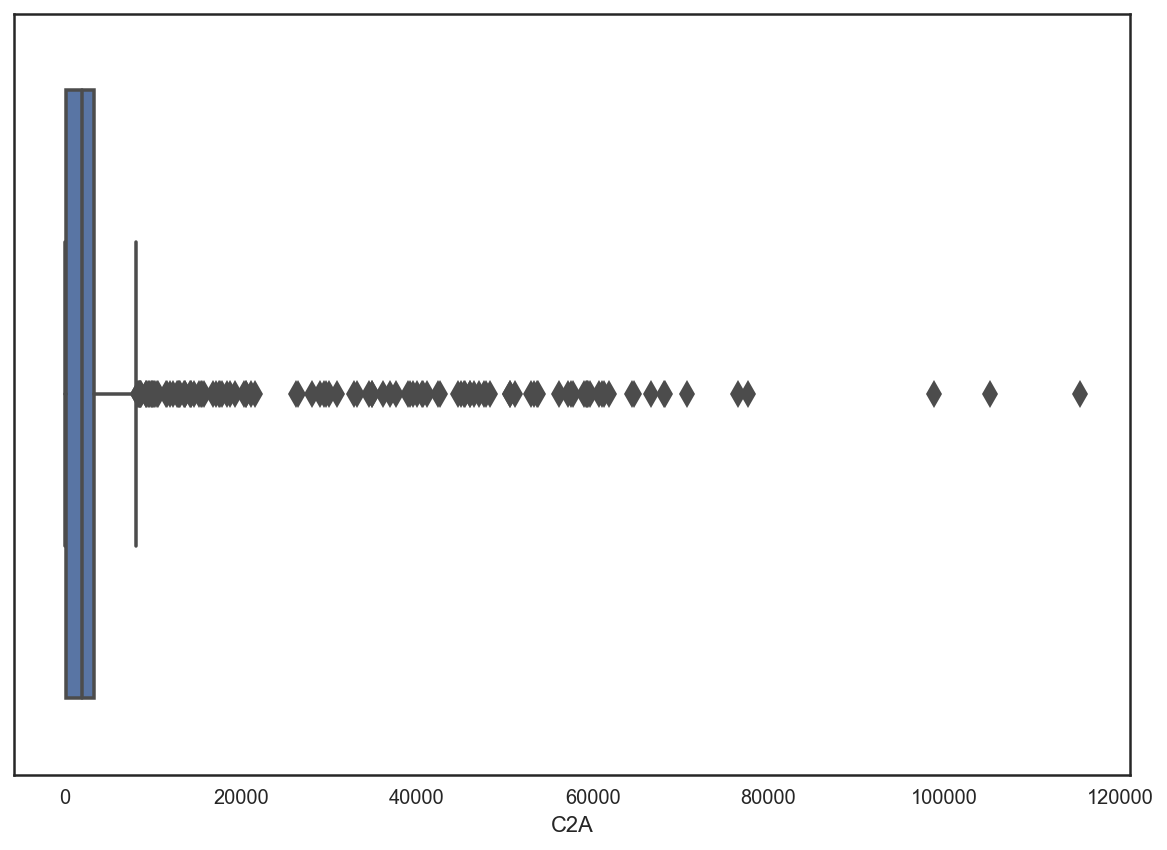

In [72]:
sns.boxplot(Fsd.C2A, orient='h', fliersize=10)

# Overall Report and Analysis

## The project is executed employing multi-country multi-variate panel dataset containing economic indicators such as GDP, Agricultural Productivity, FInancial Sector Development, and Institutional Quality for the period 1993-2013. 
## I am employing the same dataset to write my thesis, with the aim of estimating an econometric model estimating the impact of Financial Sector Development on Agricultural Productivity for a sample of 110 countries. Key varriables of interest includes PRIVCR, C2A, AgYield, rGDP, ArLand, C2Ashare-respectively representing ratio of private sector credit to GDP(measure of Financial development), Credit to Agriculture, Crop yields per hectare, real GDP, agricultural land, and the share of agricultural credit in total economy credit. 

## In terms this project 1, I have extensively expored the data, taking note of the variable descriptives, their measures of dispersion and central tendency, checking and replacing missing values with means of the destribution, verifying controlling for outliers, obtaining bivariate relationships using correlation matrix, plotting charts and graphs to study and observe the trend in all my key variables over time. I also run OLS linear regression.

## My data exploration suggests that most of the variables are influenced by outliers. The Box plots shows that there are outliers in the distribution of all 6 key variables stated above, with the log taken to normalize the distribution. 

## In terms of my 6 key variables of interest, PRIVCR, which is the measure of Financial Sector Development, shows that High income OECD member countries are the most financially developed, followed by the High income non-OECD countries. Low income countries are the least financially developed. The share of agric credit and the level of financial sector development have positive and significant impact on agricultural productivity at the 1% level of signifcance.Countries with higher level of GDP also seems to advance more credit to Agriculture over time. 